In [2]:
import pyvisa
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.dc import DC
from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.visa_drivers.signal_analyser import Anri
# from nanodrivers.visa_drivers.signal_analizar import Anri

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize

#file_store
import os

#time
import time
from datetime import datetime, timedelta

from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_2'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_2 already exists


In [3]:
path = adress +'\\'+ 'reference_line'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_2\reference_line already exists


In [4]:
vna = VNA()
vna.idn()
# vna.dump()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



# Line full BW sweep

In [35]:
1500/60

25.0

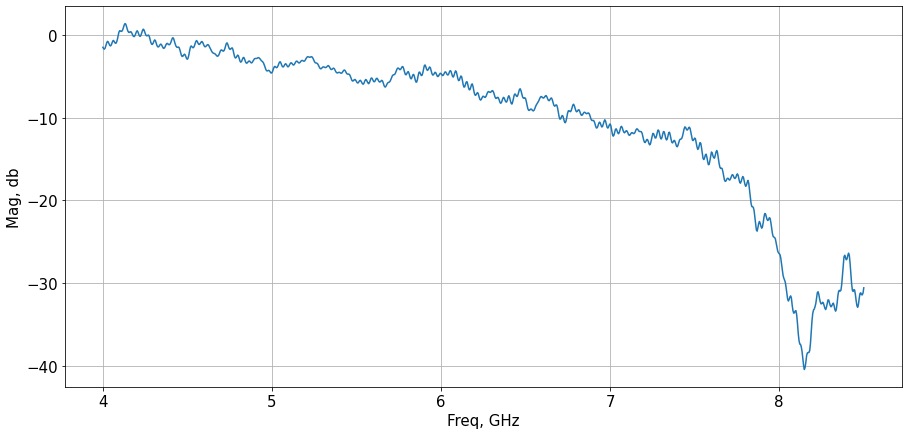

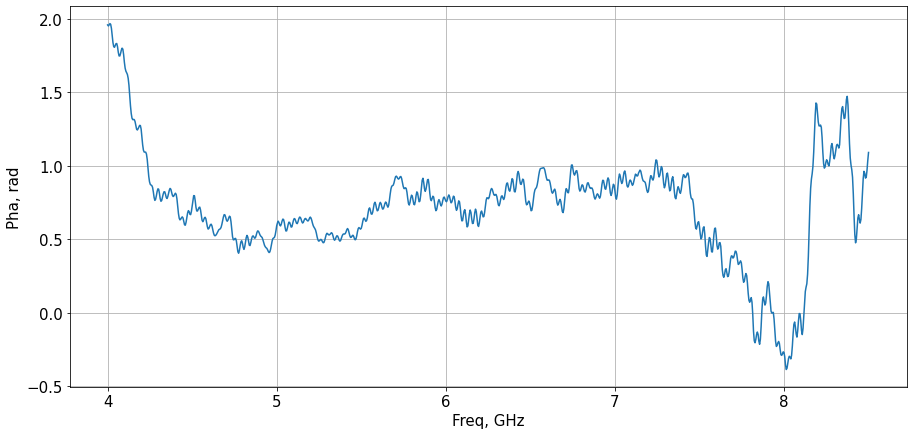

In [31]:
%matplotlib inline
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Mag, db')

vna.set_band(100)
vna.set_nop(1000)
vna.set_elength(10.3)
vna.set_power(-10)
vna.set_freq_start_stop(4e9, 8.5e9, vna.get_nop())
mag, pha, freq = vna.get_data(True)
ax.plot(freq/1e9, mag)

fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Pha, rad')
ax.plot(freq/1e9, pha)

In [29]:
start_time = datetime.now()
file = r'ref_line_fullBW_sweep_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = path +'\\' + file

state = dict()
state['freqs'] = freq
state['mag'] = mag
state['pha'] = pha
state['vna'] = vna.dump

state['temp'] = 41

savemat(file_name, state)

# Line noise

In [34]:
start_time = datetime.now()
file = r'ref_line_1f_noise_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = path +'\\' + file

state = dict()

# Set VNA param
vna.set_cw()
nop  = 201
vna.set_nop(nop)
BW = 100
vna.set_band(BW)
avg = 50
VNA_power = 0
vna.set_power(VNA_power)

state['nop'] = nop
state['BW'] = BW
state['avg'] = avg
state['VNA_power'] = VNA_power
state['VNA_state'] = vna.dump()

VNA_freqs = np.array([4, 4.8, 5, 5.2, 5.8, 6, 6.2, 6.8, 7, 7.2, 7.8, 8, 8.2, 8.8])*1e9

mag = np.zeros((nop, avg, len(VNA_freqs)))
pha = np.zeros((nop, avg, len(VNA_freqs)))

state['mag'] = mag
state['pha'] = pha

for i in range(len(VNA_freqs)):
    
    start_time = datetime.now()
    print('New round {}/{} started at {}'.format(i, len(VNA_freqs), start_time.strftime(r'%H:%M:%S')))
        
    vna.set_cw_freq(VNA_freqs[i])
    
    for j in range(avg):
        mag[:,j,i], pha[:,j,i] = vna.get_data()
        state['mag'] = mag
        state['pha'] = pha
        
    savemat(file_name, state)
    
    
    if i == 0: 
        duration_end = datetime.now()
        period = (duration_end-start_time).seconds
        
        print('Duration: {}. End of script in: {}'.format(duration_end - start_time, 
                                        timedelta(seconds=period*len(VNA_freqs))))
        

script_end_time = datetime.now()
print('Script finnished at {}'.format(script_end_time.strftime(r'%H:%M:%S')))          

New round 0/14 started at 14:55:41
Duration: 0:01:57.018903. End of script in: 0:27:18
New round 1/14 started at 14:57:38
New round 2/14 started at 14:59:35
New round 3/14 started at 15:01:32
New round 4/14 started at 15:03:28
New round 5/14 started at 15:05:25
New round 6/14 started at 15:07:22
New round 7/14 started at 15:09:19
New round 8/14 started at 15:11:16
New round 9/14 started at 15:13:13
New round 10/14 started at 15:15:10
New round 11/14 started at 15:17:07
New round 12/14 started at 15:19:04
New round 13/14 started at 15:21:01
Script finnished at 15:22:58


In [8]:
np.random.randint(20)

18

In [21]:
# %matplotlib nbagg
%matplotlib widget
from IPython.display import display, clear_output
import pylab as pl
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

pha_c = np.array([])
time_c = np.array([])

start_time = datetime.now()

for i in range(10):
    time.sleep(2)
    pha = np.random.randint(20)
    
    duration_end = datetime.now()
    period = (duration_end-start_time).seconds
    
    time_c = np.append(time_c, period)
    pha_c = np.append(pha_c, np.mean(pha))
    ax.cla()
    ax.plot(time_c, pha_c)
    display(pl.gcf())
    
    clear_output(wait = True)
    plt.pause(3)
    
dc.set_volt(0)

KeyboardInterrupt: 